In [1]:
#running a pipeline on spinach images for contours

In [2]:
import sys, traceback
import cv2
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv



In [23]:
pcv.params.debug = "plot"

In [12]:
ls dataset/test/spinach/images

2022_05_15_07_12_10.png  2022_05_20_07_25_15.png  2022_05_25_07_16_58.png
2022_05_16_07_10_14.png  2022_05_21_07_23_25.png  2022_05_26_07_15_39.png
2022_05_17_07_08_12.png  2022_05_22_07_21_46.png  2022_05_27_07_13_35.png
2022_05_18_07_29_08.png  2022_05_23_07_19_46.png  2022_05_28_07_11_39.png
2022_05_19_07_27_12.png  2022_05_24_07_17_54.png  2022_05_29_07_09_34.png


In [17]:

# Read image
img, path, filename = pcv.readimage(filename='dataset/test/spinach/images/2022_05_29_07_09_34.png')
prediction_img, prediction_path, prediction_filename = pcv.readimage(filename='dataset/test/spinach/predictions/2022_05_29_07_09_34.png')


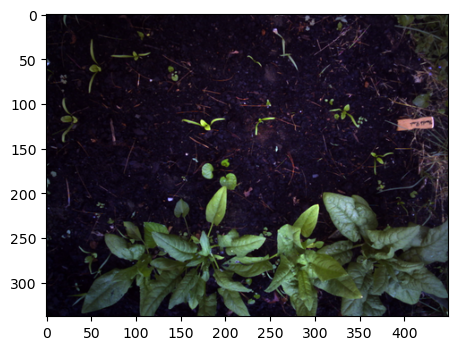

In [24]:
pcv.plot_image(img)

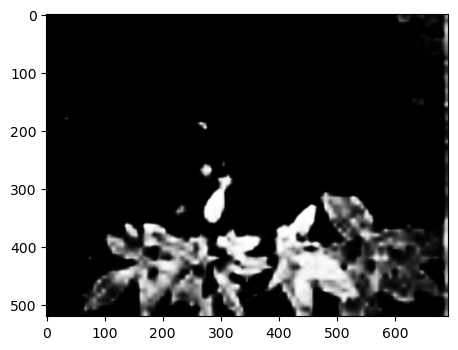

In [22]:
pcv.plot_image(prediction_img)

In [50]:
height, width = img.shape[:2]
width

450

In [51]:
prediction_img.shape

(520, 692, 3)

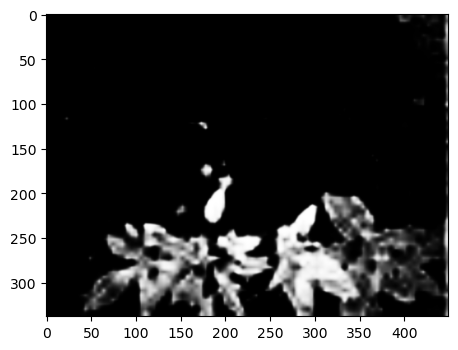

In [52]:
prediction_img_resized = pcv.transform.resize(img=prediction_img, size=(width, height), interpolation="auto")

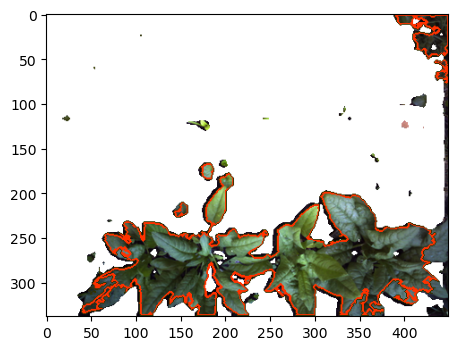

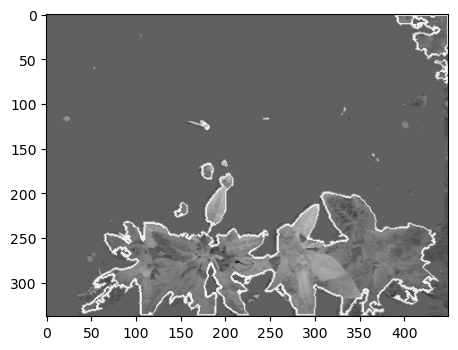

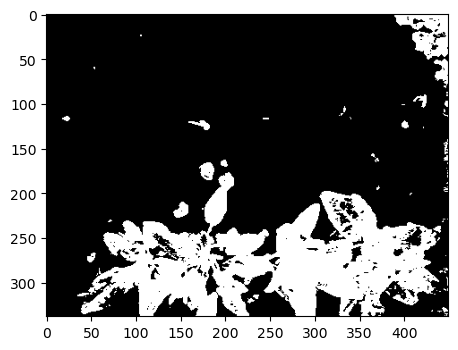

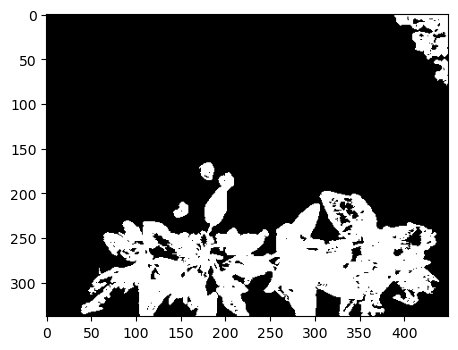

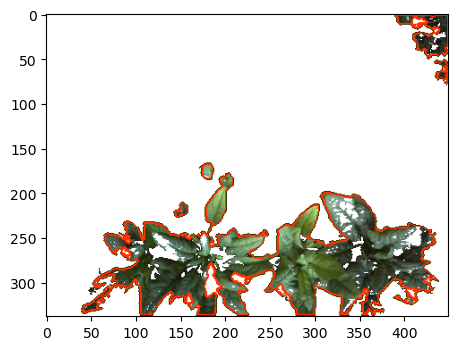

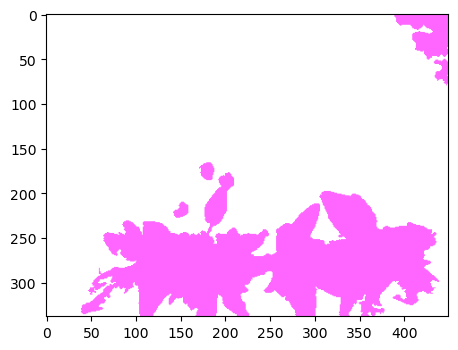

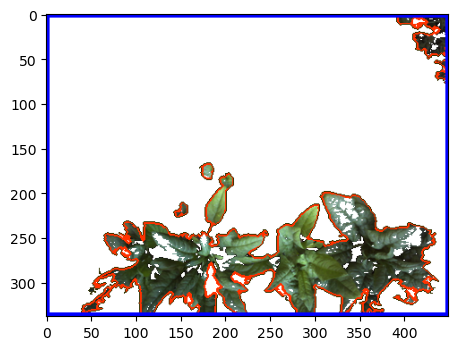

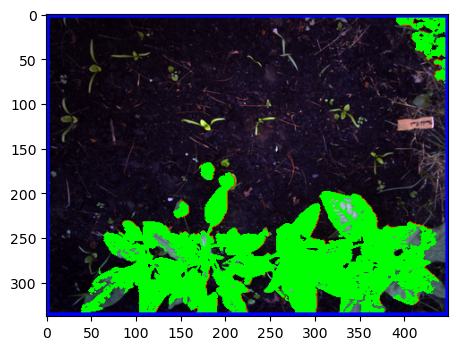

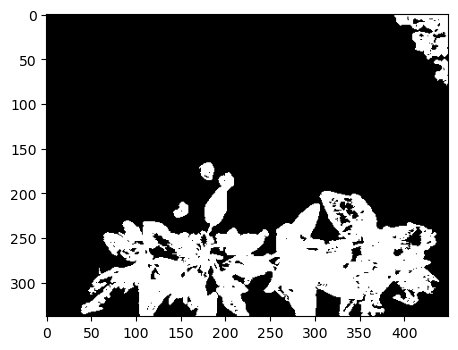

In [53]:

    # Apply Mask (for VIS images, mask_color=white)
    masked = pcv.apply_mask(img=img, mask=prediction_img_resized, mask_color='white')
    masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')
    maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')
    ab_fill = pcv.fill(bin_img=maskedb_thresh, size=150)
    masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')
    id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
    roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=0, y=0, h=height, w=width)
    roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')


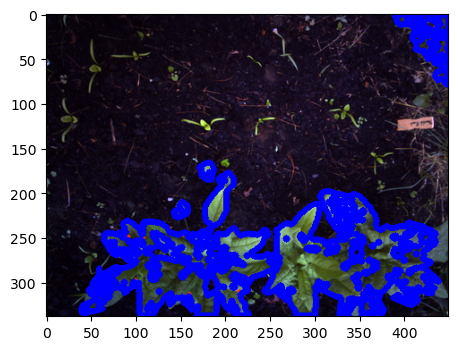

In [54]:
    obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)


In [61]:
output  = cv2.drawContours(img, obj, -1,(300,100,200),thickness=2 )

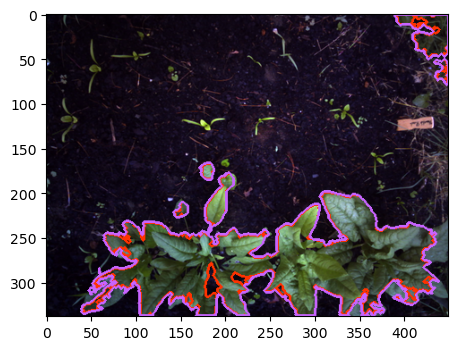

In [62]:
pcv.plot_image(output)